This code is associated with a [blog post](queueing-1.html) on using queueing theory to deciding how many rides should be serviced by one mechanic, 

# Comparing average ride profit in M/M/1/K/K models for various K

Probability of being in a state with $n$ rides broken:

 $$P_0 = \left[ \sum_{n=0}^{c-1} {K \choose n} \left(\frac{\lambda}{\mu}\right)^n + \sum_{n=c}^K \frac{K!}{(K-n)!c!c^{n-c}}\left(\frac{\lambda}{\mu}\right)^n\right]^{-1}$$

$$ \text{for $n<c$, } P_n = {K \choose n} \left(\frac{\lambda}{\mu}\right)^n P_0$$

$$ \text{for $c \le n \le K$, } P_n = \frac{K!}{(K-n)!c!c^{n-c}}\left(\frac{\lambda}{\mu}\right)^n P_0$$


For $K$ rides which each make $I_\mathrm{RC}$ while operating, total profit, averaged over time, is $$I_\mathrm{RC} \sum_{n=0}^{K} (K-n)P_n - C_\mathrm{mech} = I_\mathrm{RC} \sum_{n=0}^{K-1} (K-n)P_n - C_\mathrm{mech}$$

For c=1 mechanics we can simplify the above equations:


 $$P_0 = \left[ 1 + \sum_{n=1}^K \frac{K!}{(K-n)!}\left(\frac{\lambda}{\mu}\right)^n\right]^{-1}$$

$$ \text{for $1 \le n \le K$, } P_n = \frac{K!}{(K-n)!}\left(\frac{\lambda}{\mu}\right)^n P_0$$


Average profit for a system with $K$ rides is.

 $$ I_\mathrm{RC} \sum_{n=0}^{K-1} \frac{K!}{(K- n -1)!}\left(\frac{\lambda}{\mu}\right)^n P_0 - C_\mathrm{mech}$$
 
When comparing situations with different numbers of mechanics, it's easier perhaps to compare average profit per ride. I simplify $\lambda/\mu \to x$ and $I_\mathrm{RC}/C_\mathrm{mech} \to y$.

$$ \frac{y}{K} \left(\sum_{n=0}^{K-1} \frac{K!}{(K- n -1)!}x^n\right) P_0 - \frac{1}{K}$$
 

In [12]:
import numpy as np
from math import factorial
import matplotlib.pyplot as plt

In [4]:
def A(K, x):
    """Evaluates the summation in parenthesis above, a function of K and x.
    """
    s = sum([factorial(K)*(x**n)/factorial(K-n-1) for n in range(K)])
    return s

In [3]:
def B(K, x):
    """Evaluates P0, which is a function of K and x.
    """
    s = sum([factorial(K)*(x**n)/factorial(K-n) for n in range(K+1)])
    return s

In [11]:
def compare(m, n, x):
    """
    Compare two situations with K1 = m and K2 = n.
    
    Solution of 
    
    y/n A_n/B_n - 1/n = y/m A_m/B_m - 1/m
    
    where A_n and B_n are polynomial functions of x.
    
              (m - n)
    y = ---------------------
        m A_n / B_n - n A_m / B_m
    """    
    numerator = m - n
    denominator = m * A(n, x) / B(n, x) - n * A(m, x) / B(m, x)
    return numerator / denominator

In [9]:
mechanic_cost_per_year = 640

x = np.logspace(-2,1,50)

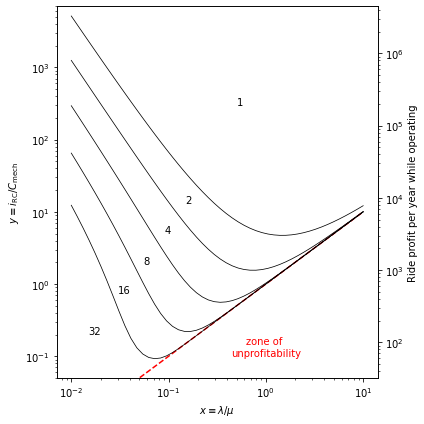

In [10]:
fix, ax = plt.subplots(figsize=(6,6))
#ax.set_aspect(1)

ax.text(0.5, 0.3e3, '1')
master_lw = 0.75
ax.plot(x, compare(1, 2, x), color='k', lw=master_lw)
#ax.plot(x, profitable(4,x), color='blue')
#ax.plot(x, profitable(8,x), color='red')
ax.plot(x, x, ls='dashed', color='red')
ax.text(1.0, 0.1, 'zone of \nunprofitability', color='red', horizontalalignment='center')


ax.text(0.15, 0.13e2, '2')

ax.plot(x, compare(2, 4, x), color='k', lw=master_lw)

ax.text(0.09, 5, '4')

ax.plot(x, compare(4, 8, x), color='k', lw=master_lw)
ax.text(0.055, 1.9, '8')

ax.plot(x, compare(8, 16, x), color='k', lw=master_lw)
ax.text(0.03, 0.75, '16')

ax.plot(x, compare(16, 32, x), color='k', lw=master_lw)
ax.text(0.015, 0.2, '32')

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim(0.5e-1, 7e3)
ax.set_xlabel(r'$x \equiv \lambda/\mu$')
ax.set_ylabel(r'$y \equiv i_\mathrm{RC}/C_\mathrm{mech}$')

ax2 = ax.twinx()
ax2.set_ylim([mechanic_cost_per_year * 0.5e-1, mechanic_cost_per_year *7e3])
ax2.set_yscale('log')
ax2.set_ylabel('Ride profit per year while operating')

plt.tight_layout()
#plt.savefig('queueing-1-rides-serviced-by-one-mechanic.png')
plt.show()

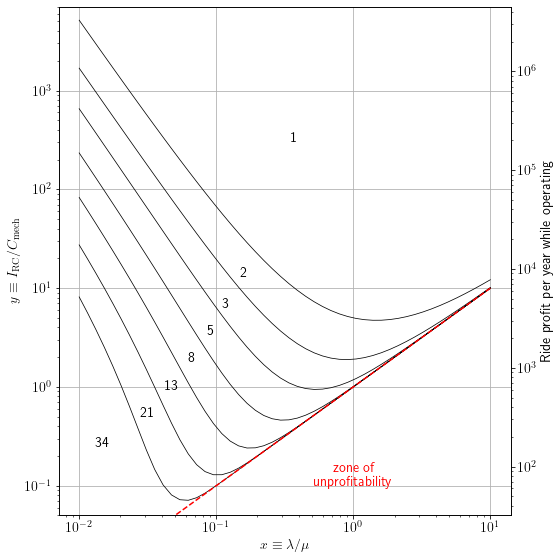

In [826]:
fix, ax = plt.subplots(figsize=(8,8))
#ax.set_aspect(1)
plt.rcParams['text.usetex'] = True

ax.text(0.35, 0.3e3, '1')
master_lw = 0.75
ax.plot(x, compare(1, 2, x), color='k', lw=master_lw)

ax.text(0.15, 0.13e2, '2')

ax.plot(x, compare(2, 3, x), color='k', lw=master_lw)

ax.text(0.11, 6.3, '3')

ax.plot(x, compare(3, 5, x), color='k', lw=master_lw)
ax.text(0.085, 3.33, '5')

ax.plot(x, compare(5, 8, x), color='k', lw=master_lw)
ax.text(0.062, 1.78, '8')

ax.plot(x, compare(8, 13, x), color='k', lw=master_lw)
ax.text(0.042, 0.94, '13')

ax.plot(x, compare(13, 21, x), color='k', lw=master_lw)
ax.text(0.028, 0.5, '21')

ax.plot(x, compare(21, 34, x), color='k', lw=master_lw)
ax.text(0.013, 0.25, '34')

ax.plot(x, x, ls='dashed', color='red')
ax.text(1.0, 0.1, 'zone of \nunprofitability', color='red', horizontalalignment='center')

ax.grid()

ax.set_ylim(0.5e-1, 7e3)
ax2 = ax.twinx()
ax2.set_ylim([mechanic_cost_per_year * 0.5e-1, mechanic_cost_per_year *7e3])
ax2.set_yscale('log')
ax2.set_ylabel('Ride profit per year while operating')

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'$x \equiv \lambda/\mu$')
ax.set_ylabel(r'$y \equiv I_\mathrm{RC}/C_\mathrm{mech}$')
plt.tight_layout()
#plt.savefig('queueing-1-rides-serviced-by-one-mechanic.png')
plt.show()

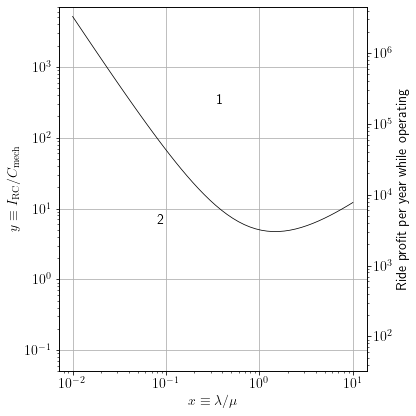

In [807]:
fix, ax = plt.subplots(figsize=(6,6))
#ax.set_aspect(1)
plt.rcParams['text.usetex'] = True

ax.text(0.35, 0.3e3, '1')
master_lw = 0.75
ax.plot(x, compare(1, 2, x), color='k', lw=master_lw)

ax.text(0.08, 0.06e2, '2')

ax.grid()

ax.set_ylim(0.5e-1, 7e3)
ax2 = ax.twinx()
ax2.set_ylim([mechanic_cost_per_year * 0.5e-1, mechanic_cost_per_year *7e3])
ax2.set_yscale('log')
ax2.set_ylabel('Ride profit per year while operating')

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'$x \equiv \lambda/\mu$')
ax.set_ylabel(r'$y \equiv I_\mathrm{RC}/C_\mathrm{mech}$')
plt.tight_layout()
#plt.savefig('queueing-1-one-vs-two-mechanics.png')
plt.show()